In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from evalys.jobset import JobSet, ProcSet
from evalys.visu.legacy import plot_gantt

In [3]:
def visualize_avg_waiting_time(jobs_f, sim_f, jobs_e, sim_e):
    fcfs, easy = jobs_f.to_dataframe(), jobs_e.to_dataframe()

    fcfs, easy = JobSet(fcfs), JobSet(easy)

    fcfs, easy = sim_f.to_dataframe(), sim_e.to_dataframe()
    fcfs['name'], easy['name'] = "FCFS", "EASY"
    benchmark = pd.concat([fcfs, easy], ignore_index=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar('name', 'mean_waiting_time', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Waiting Time")

    plt.subplot(1, 2, 2)
    plt.bar('name', 'mean_slowdown', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Slowdown")

    plt.show()
    
def visualize_schedule(jobs_easy_batsim, jobs_easy_sp, filepath, max_x):

    _, ax_list = plt.subplots(nrows=2, ncols=1, figsize=(150, 8))
    plot_gantt(jobs_easy_batsim, ax=ax_list[0], title="BATSIM")
    plot_gantt(jobs_easy_sp, ax=ax_list[1], title="SP")

    ax_list[0].set_ylim(0, 16)
    ax_list[1].set_ylim(0, 16)
    ax_list[0].set_xlim(0, max_x)
    ax_list[1].set_xlim(0, max_x)
    ax_list[0].set_yticks(range(16))
    ax_list[1].set_yticks(range(16))

    plt.savefig(filepath)
    plt.show()


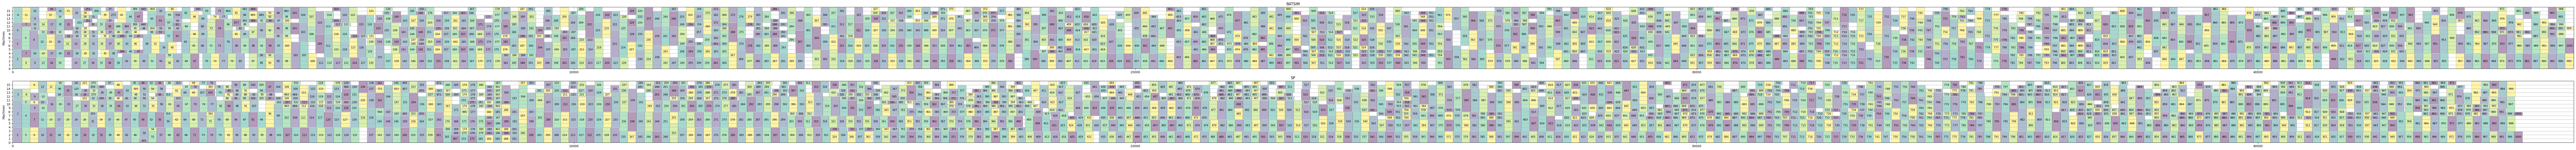

In [4]:
jobs_easy_batsim = pd.read_csv('results/batsim/baseline/easy_jobs_simple_1000_batsched.csv')
jobs_easy_batsim['job_id'] = jobs_easy_batsim['job_id'].astype(str)
jobs_easy_batsim['profile'] = jobs_easy_batsim['profile'].astype(str) 
jobs_easy_batsim = pd.DataFrame(jobs_easy_batsim)
max_jobs_easy_batsim = jobs_easy_batsim['finish_time'].max()
jobs_easy_batsim['allocated_resources'] = jobs_easy_batsim['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_batsim = JobSet(jobs_easy_batsim)

jobs_easy_sp = pd.read_csv('results/cssp/baseline/easy_jobs_simple_1000.csv')
jobs_easy_sp['job_id'] = jobs_easy_sp['job_id'].astype(str)  
jobs_easy_sp['profile'] = jobs_easy_sp['profile'].astype(str)
jobs_easy_sp = pd.DataFrame(jobs_easy_sp)
max_jobs_easy_sp = jobs_easy_sp['finish_time'].max()
jobs_easy_sp['allocated_resources'] = jobs_easy_sp['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_sp = JobSet(jobs_easy_sp)

max_x = max(max_jobs_easy_batsim, max_jobs_easy_sp)

visualize_schedule(jobs_easy_batsim, jobs_easy_sp, 'plt/comparison/easy_baseline_simple_1000.png', max_x)

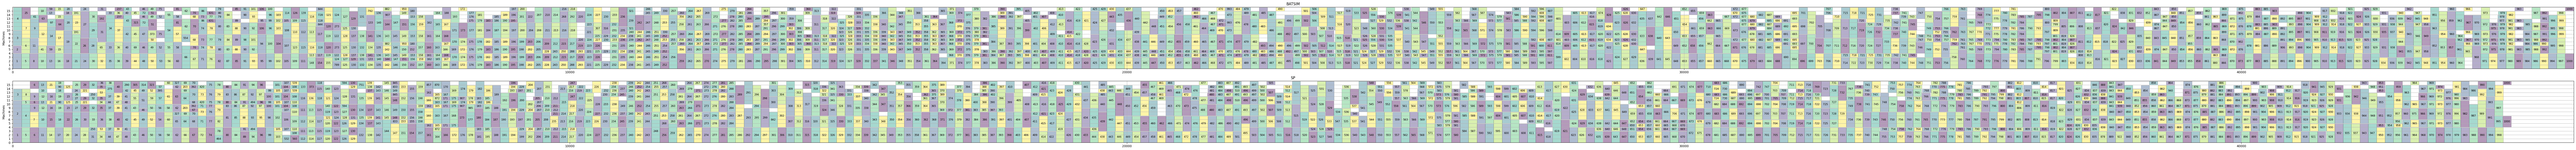

In [5]:
timeout = 30
jobs_easy_batsim = pd.read_csv(f'results/batsim/timeout/easy_jobs_t{timeout}.csv')
jobs_easy_batsim['job_id'] = jobs_easy_batsim['job_id'].astype(str)
jobs_easy_batsim['profile'] = jobs_easy_batsim['profile'].astype(str) 
jobs_easy_batsim = pd.DataFrame(jobs_easy_batsim)
max_jobs_easy_batsim = jobs_easy_batsim['finish_time'].max()
jobs_easy_batsim['allocated_resources'] = jobs_easy_batsim['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_batsim = JobSet(jobs_easy_batsim)

jobs_easy_sp = pd.read_csv(f'results/cssp/timeout/easy_jobs_t{timeout}.csv')
jobs_easy_sp['job_id'] = jobs_easy_sp['job_id'].astype(str)  
jobs_easy_sp['profile'] = jobs_easy_sp['profile'].astype(str)
jobs_easy_sp = pd.DataFrame(jobs_easy_sp)
max_jobs_easy_sp = jobs_easy_sp['finish_time'].max()
jobs_easy_sp['allocated_resources'] = jobs_easy_sp['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_sp = JobSet(jobs_easy_sp)



max_x = max(max_jobs_easy_batsim, max_jobs_easy_sp)

visualize_schedule(jobs_easy_batsim, jobs_easy_sp, 'plt/comparison/easy_t30.png', max_x)

In [6]:
# compare jobs monitor SP-Timeout and BATSIM-Timeout
timeout = 30
jobs_easy_batsim = pd.read_csv(f'results/batsim/timeout/easy_jobs_t{timeout}.csv')
jobs_easy_sp = pd.read_csv(f'results/cssp/timeout/easy_jobs_t{timeout}.csv')
# jobs_easy_batsim = pd.read_csv(f'results/batsim/baseline/easy_jobs_fe_0.csv')
# jobs_easy_sp = pd.read_csv(f'results/cssp/baseline/easy_jobs_fe_0.csv')

jobs_easy_batsim = jobs_easy_batsim.sort_values(by='job_id', ascending=True).reset_index(drop=True)
jobs_easy_sp = jobs_easy_sp.sort_values(by='job_id', ascending=True).reset_index(drop=True)

execution_time_diff = jobs_easy_batsim['execution_time'] - jobs_easy_sp['execution_time']
start_time_diff = jobs_easy_batsim['starting_time'] - jobs_easy_sp['starting_time']
finish_time_diff = jobs_easy_batsim['finish_time'] - jobs_easy_sp['finish_time']

def expand_ranges(input_str):
    parts = input_str.split()
    result = []

    for part in parts:
        if '-' in part:
            start, end = map(int, part.split('-'))
            result.extend(str(i) for i in range(start, end + 1))
        else:
            result.append(part)

    result = sorted(result)
    return ' '.join(result)

same_node_used = jobs_easy_batsim['allocated_resources'].apply(expand_ranges) == jobs_easy_sp['allocated_resources'].apply(expand_ranges)

result_df = pd.DataFrame({
    'job_id': jobs_easy_batsim['job_id'],
    'sp_start': jobs_easy_sp['starting_time'],
    'batsim_start': jobs_easy_batsim['starting_time'],
    'sp_finish': jobs_easy_sp['finish_time'],
    'batsim_finish': jobs_easy_batsim['finish_time'],
    'start_diff': start_time_diff,
    'exec_diff': execution_time_diff,
    'finish_diff': finish_time_diff,
    'same_node_used': same_node_used,
    "batsim_node_used": jobs_easy_batsim['allocated_resources'],
    "sp_node_used": jobs_easy_sp['allocated_resources']
})

display(result_df)


job_id  sp_start  batsim_start  sp_finish  batsim_finish  start_diff  \
0         1        12           3.0        163          157.0        -9.0   
1         2        13          10.0        162          156.0        -3.0   
2         3        16          12.0        167          161.0        -4.0   
3         4       162          15.0        313          167.0      -147.0   
4         5       163         157.0        309          306.0        -6.0   
..      ...       ...           ...        ...            ...         ...   
995     996     43789       45515.0      43935        45668.0      1726.0   
996     997     44542       45658.0      44691        45808.0      1116.0   
997     998     44551       45666.0      44700        45813.0      1115.0   
998     999     44551       45668.0      44702        45818.0      1117.0   
999    1000     44692       45813.0      44841        45966.0      1121.0   

     exec_diff  finish_diff  same_node_used batsim_node_used    sp_node_used  
0          3.0         -6.0            True              0-3         0 1 2 3  
1         -3.0         -6.0           False              4-5  4 5 6 7 8 9 10  
2         -2.0         -6.0           False              6-9        11 12 13  
3          1.0       -146.0           False            10-15     4 5 6 7 8 9  
4          3.0         -3.0           False              0-3      0 1 2 3 10  
..         ...          ...             ...              ...             ...  
995        7.0       1733.0           False        8-9 11-13        6 7 8 11  
996        1.0       1117.0           False              0-3        7 8 9 10  
997       -2.0       1113.0           False        4-7 10 14         0 1 2 3  
998       -1.0       1116.0           False        8-9 11-13     11 12 13 14  
999        4.0       1125.0           False           0-3 15        4 5 6 15  

[1000 rows x 11 columns]

In [7]:
# Compare nodes states SP-Timeout and BATSIM-Timeout
import pandas as pd
from IPython.display import display

timeout = 30
jobs_easy_batsim = pd.read_csv(f'results/batsim/timeout/easy_host_t{timeout}.csv')
jobs_easy_sp = pd.read_csv(f'results/cssp/timeout/easy_host_t{timeout}.csv')

jobs_easy_batsim = jobs_easy_batsim.sort_values(by='time', ascending=True).reset_index(drop=True)
jobs_easy_sp = jobs_easy_sp.sort_values(by='time', ascending=True).reset_index(drop=True)

columns_to_compare = ['sleeping', 'switching_on', 'switching_off', 'idle', 'computing']

result_df = pd.DataFrame({
    'time': jobs_easy_batsim['time']
})


for col in columns_to_compare:
    result_df[f'{col}_diff'] = jobs_easy_batsim[f'nb_{col}'] - jobs_easy_sp[col]

display(result_df)

# result_df.to_csv('comparison_result.csv', index=False)


time  sleeping_diff  switching_on_diff  switching_off_diff  idle_diff  \
0         0            0.0                0.0                 0.0        0.0   
1         3            0.0                0.0                 0.0        0.0   
2        10            0.0                0.0                 0.0        5.0   
3        12            0.0                0.0                 0.0        4.0   
4        15            0.0                0.0                -2.0        0.0   
...     ...            ...                ...                 ...        ...   
1447  45848            NaN                NaN                 NaN        NaN   
1448  45853            NaN                NaN                 NaN        NaN   
1449  45966            NaN                NaN                 NaN        NaN   
1450  45996            NaN                NaN                 NaN        NaN   
1451  46001            NaN                NaN                 NaN        NaN   

      computing_diff  
0                0.0  
1                0.0  
2               -5.0  
3               -4.0  
4                2.0  
...              ...  
1447             NaN  
1448             NaN  
1449             NaN  
1450             NaN  
1451             NaN  

[1452 rows x 6 columns]

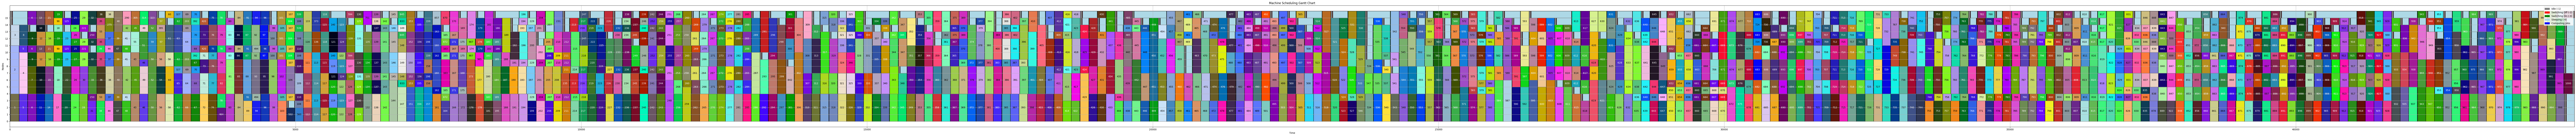

In [9]:
# PLOT SCHEDULE WITHOUT SUBTIME
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

timeout = 30
predict = False
# data = pd.read_csv(f"results/sp/{'tp' if predict else f'timeout'}/easy_nodes_t{timeout}{'_predict' if predict else ''}.csv")
data = pd.read_csv('results/cssp/timeout/easy_nodes_t30.csv')
all_nodes = set()
timeline = []

for index, row in data.iterrows():
    nodes = list(map(int, row['allocated_resources'].split())) 
    all_nodes.update(nodes)
    timeline.append({
        'starting_time': float(row['starting_time']), 
        'finish_time': float(row['finish_time']), 
        'allocated_resources': nodes,
        'type': row['type'], 
        'job_id': int(row['job_id'])
    })

fig, ax = plt.subplots(figsize=(150, 8))
max_time = max([ev['finish_time'] for ev in timeline])
max_node = max(all_nodes)

colors = {
    -1: 'gray',      
    -2: 'red',        
    -3: 'green',    
    -4: 'lightblue'    
}

job_colors = {}

for event in timeline:
    nodes = sorted(event['allocated_resources'])
    groups = []
    while nodes:
        start = nodes[0]
        end = start
        while nodes and nodes[0] == end:
            end += 1
            nodes.pop(0)
        groups.append((start, end - start))
    
    for y, height in groups:
        if event['job_id'] in colors:
            color = colors[event['job_id']]
        else:
            if event['job_id'] not in job_colors:
                job_colors[event['job_id']] = np.random.rand(3,)
            color = job_colors[event['job_id']]
        
        ax.broken_barh([(event['starting_time'], event['finish_time'] - event['starting_time'])], 
                      (y, height), facecolors=color, edgecolor='black')
        
        if event['job_id'] > 0:
            ax.text((event['starting_time'] + event['finish_time'])/2, y + height/2, 
                    str(event['job_id']), ha='center', va='center',
                    color='white' if np.mean(color) < 0.5 else 'black')

ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
ax.set_yticks(range(16))
ax.set_yticklabels(range(16))
ax.set_xlim(0, max_time)
ax.grid(True)

legend_patches = [
    mpatches.Patch(color='gray', label='Idle (-1)'),
    mpatches.Patch(color='red', label='Switching Off (-2)'),
    mpatches.Patch(color='green', label='Switching On (-3)'),
    mpatches.Patch(color='lightblue', label='Sleeping (-4)'),
    mpatches.Patch(color='blue', label='Computing Jobs')
]
ax.legend(handles=legend_patches, loc='upper right')

plt.title('Machine Scheduling Gantt Chart')
plt.tight_layout()
# plt.savefig(f"plt/sp/easy_rl.png")
plt.savefig(f"plt/sp/easy_t30.png")
plt.show()

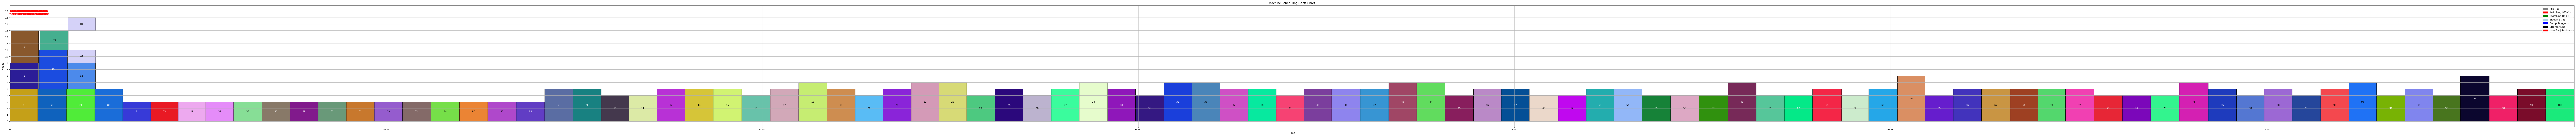

In [ ]:
# PLOT SCHEDULE WITH SUBTIME
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

timeout = 30
predict = True
data = pd.read_csv(f"results/cssp/{'tp' if predict else f'timeout'}/easy_nodes_t{timeout}{'_predict' if predict else ''}.csv")
# data = pd.read_csv('results/sp/rl/easy_nodes.csv')

all_nodes = set()
timeline = []

for index, row in data.iterrows():
    nodes = list(map(int, row['allocated_resources'].split())) 
    all_nodes.update(nodes)
    timeline.append({
        'submission_time': float(row['submission_time']), 
        'starting_time': float(row['starting_time']), 
        'finish_time': float(row['finish_time']), 
        'allocated_resources': nodes,
        'type': row['type'], 
        'job_id': int(row['job_id']) 
    })

# Create figure
fig, ax = plt.subplots(figsize=(150, 8))
max_time = max([ev['finish_time'] for ev in timeline])
max_node = max(all_nodes)

# Color mapping
colors = {
    -1: 'gray',    
    -2: 'red',        
    -3: 'green',      
    -4: 'lightblue'   
}

job_colors = {}

for event in timeline:
    nodes = sorted(event['allocated_resources'])
    groups = []
    while nodes:
        start = nodes[0]
        end = start
        while nodes and nodes[0] == end:
            end += 1
            nodes.pop(0)
        groups.append((start, end - start))
    
    for y, height in groups:
        if event['job_id'] in colors:
            color = colors[event['job_id']]
        else:
            if event['job_id'] not in job_colors:
                job_colors[event['job_id']] = np.random.rand(3,)
            color = job_colors[event['job_id']]
        
        ax.broken_barh([(event['starting_time'], event['finish_time'] - event['starting_time'])], 
                      (y, height), facecolors=color, edgecolor='black')
        
        if event['job_id'] > 0:
            ax.text((event['starting_time'] + event['finish_time'])/2, y + height/2, 
                    str(event['job_id']), ha='center', va='center',
                    color='white' if np.mean(color) < 0.5 else 'black')

ax.errorbar(x=[5000], y=[17], xerr=5000, fmt='-', color='black')

for event in timeline:
    if event['job_id'] > 0:
        ax.plot(event['submission_time'], 17, 'ro')
        ax.text(event['submission_time'], 16.5, str(event['job_id']), ha='center', va='center', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
ax.set_yticks(range(18))
ax.set_yticklabels(range(18))
ax.set_xlim(0, max_time)
ax.grid(True)

legend_patches = [
    mpatches.Patch(color='gray', label='Idle (-1)'),
    mpatches.Patch(color='red', label='Switching Off (-2)'),
    mpatches.Patch(color='green', label='Switching On (-3)'),
    mpatches.Patch(color='lightblue', label='Sleeping (-4)'),
    mpatches.Patch(color='blue', label='Computing Jobs'),
    mpatches.Patch(color='black', label='Errorbar Line'),
    mpatches.Patch(color='red', label='Dots for job_id > 0')
]
ax.legend(handles=legend_patches, loc='upper right')

plt.title('Machine Scheduling Gantt Chart')
plt.tight_layout()
plt.savefig(f"plt/sp/easy_t{timeout}{'_predict' if predict else ''}.png")
# plt.savefig(f"plt/sp/easy_rl2.png")
plt.show()


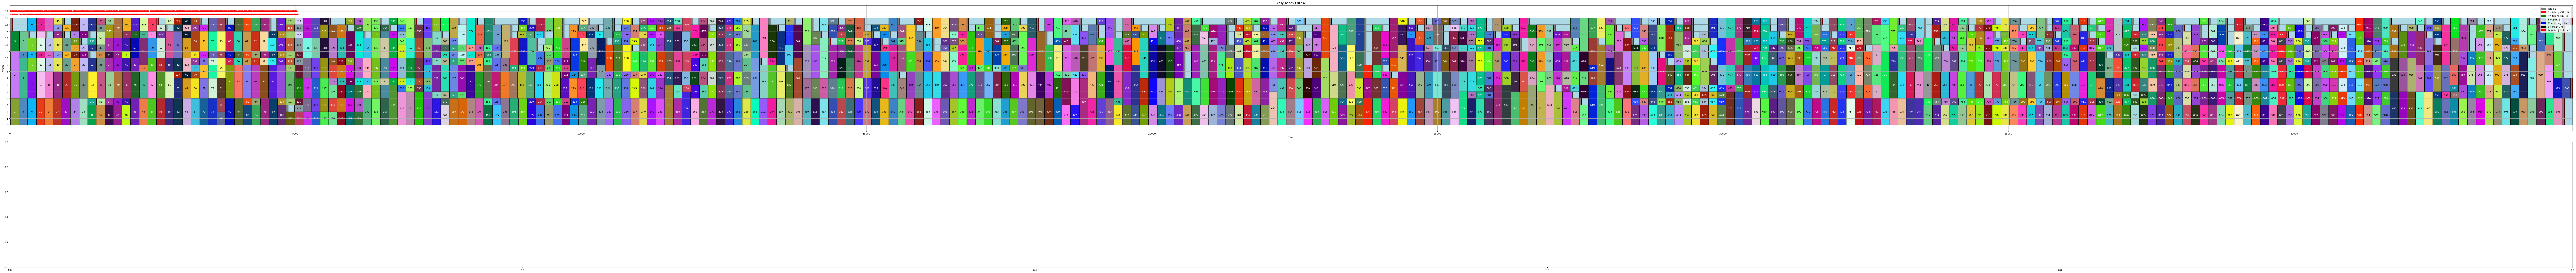

In [11]:
timeout = 30

def parse_data(file_path):
    data = pd.read_csv(file_path)
    all_nodes = set()
    timeline = []

    for index, row in data.iterrows():
        nodes = list(map(int, row['allocated_resources'].split()))  
        all_nodes.update(nodes)
        timeline.append({
            'submission_time': float(row['submission_time']),  
            'starting_time': float(row['starting_time']),  
            'finish_time': float(row['finish_time']),  
            'allocated_resources': nodes,
            'type': row['type'],  
            'job_id': int(row['job_id'])  
        })
    
    return all_nodes, timeline

def plot_timeline(ax, all_nodes, timeline, title):
    max_time = max([ev['finish_time'] for ev in timeline])
    max_node = max(all_nodes)


    colors = {
        -1: 'gray',   
        -2: 'red',      
        -3: 'green',       
        -4: 'lightblue'
    }

    job_colors = {}

    for event in timeline:
        nodes = sorted(event['allocated_resources'])
        groups = []
        while nodes:
            start = nodes[0]
            end = start
            while nodes and nodes[0] == end:
                end += 1
                nodes.pop(0)
            groups.append((start, end - start))
        
        for y, height in groups:
            if event['job_id'] in colors:
                color = colors[event['job_id']]
            else:
                if event['job_id'] not in job_colors:
                    job_colors[event['job_id']] = np.random.rand(3,)
                color = job_colors[event['job_id']]
            
            ax.broken_barh([(event['starting_time'], event['finish_time'] - event['starting_time'])], 
                          (y, height), facecolors=color, edgecolor='black')
            
            if event['job_id'] > 0:
                ax.text((event['starting_time'] + event['finish_time'])/2, y + height/2, 
                        str(event['job_id']), ha='center', va='center',
                        color='white' if np.mean(color) < 0.5 else 'black')

    ax.errorbar(x=[5000], y=[17], xerr=5000, fmt='-', color='black')

    for event in timeline:
        if event['job_id'] > 0:
            ax.plot(event['submission_time'], 17, 'ro')
            ax.text(event['submission_time'], 16.5, str(event['job_id']), ha='center', va='center', color='red')

    ax.set_xlabel('Time')
    ax.set_ylabel('Nodes')
    ax.set_yticks(range(18))
    ax.set_yticklabels(range(18))
    ax.set_xlim(0, max_time)
    ax.grid(True)
    ax.set_title(title)

    legend_patches = [
        mpatches.Patch(color='gray', label='Idle (-1)'),
        mpatches.Patch(color='red', label='Switching Off (-2)'),
        mpatches.Patch(color='green', label='Switching On (-3)'),
        mpatches.Patch(color='lightblue', label='Sleeping (-4)'),
        mpatches.Patch(color='blue', label='Computing Jobs'),
        mpatches.Patch(color='black', label='Errorbar Line'),
        mpatches.Patch(color='red', label='Dots for job_id > 0')
    ]
    ax.legend(handles=legend_patches, loc='upper right')

all_nodes_1, timeline_1 = parse_data(f'results/cssp/timeout/easy_nodes_t{timeout}.csv')
# all_nodes_2, timeline_2 = parse_data(f'results/cssp/tp/easy_nodes_t{timeout}_predict.csv')

fig, axes = plt.subplots(2, 1, figsize=(150, 16))

plot_timeline(axes[0], all_nodes_1, timeline_1, f'easy_nodes_t{timeout}.csv')

# plot_timeline(axes[1], all_nodes_2, timeline_2, f'easy_nodes_t{timeout}_predict.csv')

plt.tight_layout()
plt.savefig(f'plt/comparison/tvstp_t{timeout}.png')
plt.show()


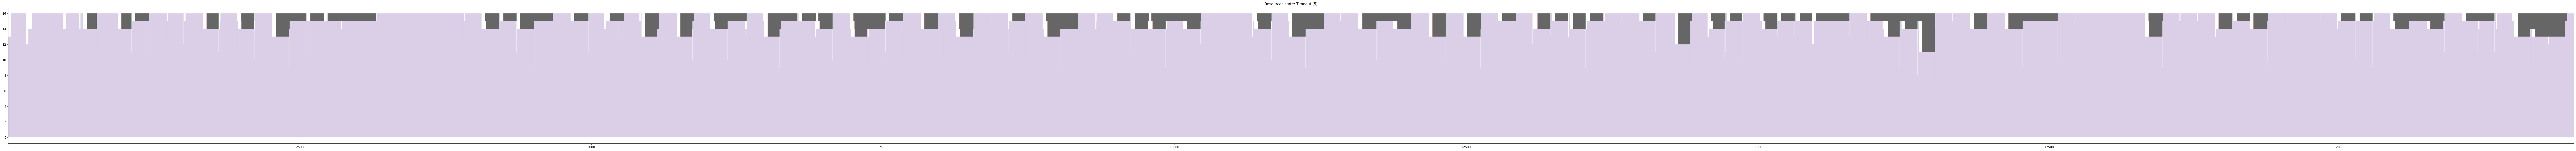

In [ ]:
from evalys.mstates import MachineStatesChanges
from evalys.visu.legacy import plot_mstates

t_5 = pd.read_csv('results/batsim/easy_host_t5.csv')
_, ax_list = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(150, 8))

plot_mstates(t_5, ax=ax_list, title="Resources state: Timeout (5)")


plt.xlim(xmin=0, xmax=22000)
plt.show()